In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def get_confidence_interval(alpha, data):
    N, mean, std = data.count(), np.mean(data), np.std(data)
    return stats.norm.interval(alpha, loc=mean, scale=std/np.sqrt(N))

### 第7題

#### (1) 不管抽樣的地區，該候選人支持度的一個95%信賴區間為何？

In [3]:
high = np.concatenate((np.zeros(700), np.ones(300)))
medium = np.concatenate((np.zeros(800), np.ones(200)))
low = np.concatenate((np.zeros(400), np.ones(100)))
sample = np.concatenate((high, medium, low))

In [4]:
confidence_level = 0.95
degrees_freedom = sample.shape[0] - 1
sample_mean = np.mean(sample)
sample_standard_error = stats.sem(sample)

confidence_interval = stats.t.interval(
    confidence_level, 
    degrees_freedom, 
    sample_mean, 
    sample_standard_error
)
confidence_interval

(0.22324718567325424, 0.25675281432674574)

#### (2) 若考慮抽樣的地區，你會如何修正(1)的結果？
三個地區分別求出不同的信賴區間再做加權。

### 第9題

In [5]:
# read data from csv file
data = pd.read_csv("期中作業題目.csv")
data.head()

,Gender,Score1,Score2
0,male,88,86
1,male,90,88
2,female,85,80
3,male,66,76
4,female,79,84


In [6]:
data.count()

Gender    100
Score1    100
Score2    100
dtype: int64

#### (1) 畫Score1及Score2的直方圖，看是否為單峰或接近常態？
Ans: 單峰

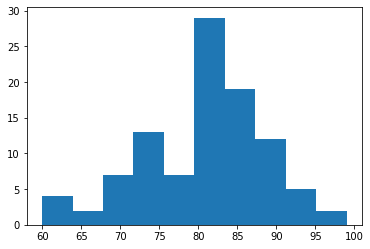

In [7]:
plt.hist(data.Score1)
plt.show()

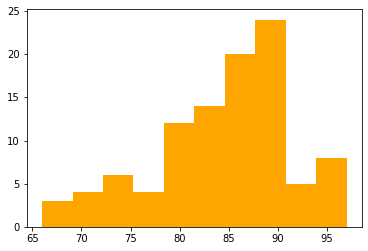

In [8]:
plt.hist(data.Score2, color="orange")
plt.show()

#### (2) 檢定Score1的平均數是否為85分？(5%顯著水準)
1. H<sub>0</sub>: $X=85$, H<sub>1</sub>: $X\neq85$
2. $\bar{X}=80.56, \sigma=7.84$
3. 95%信賴區間：$(79.02, 82.10)$
4. 因為85不在信賴區間內，所以在5%顯著水準下，拒絕虛無假設。(Score1的平均數不為85分)

In [9]:
np.mean(data.Score1), np.std(data.Score1)

(80.56, 7.842601609160063)

In [10]:
stats.norm.interval(0.95, loc=np.mean(data.Score1), scale=np.std(data.Score1)/np.sqrt(data.Score1.count()))

(79.02287833009504, 82.09712166990496)

#### (3) 檢定Score1的平均數是否比Score2小？(5%顯著水準)
1. H<sub>0</sub>: $\bar{X1}-\bar{X2}<0$, H<sub>1</sub>: $\bar{X1}-\bar{X2}>=0$
2. 假設兩個獨立，$\bar{X1}-\bar{X2}=-3.92$, $Var(\bar{X1}-\bar{X2})=Var(\bar{X1})+Var(\bar{X2})=109.016$
3. 95%信賴區間：$(-5.37, -2.47)$
4. 信賴區間皆小於0，所以在5%顯著水準下，接受虛無假設。(Score1的平均數比Score2小)

In [11]:
mean = np.mean(data.Score1) - np.mean(data.Score2)
mean

-3.9200000000000017

In [12]:
var = np.var(data.Score1) + np.var(data.Score2)
var

109.01600000000005

In [13]:
std = np.sqrt(var)
std

10.441072741821122

In [14]:
stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(data.Score1.count()+data.Score2.count()))

(-5.367032264320309, -2.4729677356796946)

#### (4) 求男性Score1平均分數的95%信賴區間

In [15]:
get_confidence_interval(0.95, data.Score1)

(79.02287833009504, 82.09712166990496)

#### (5) 求女性Score1平均分數的95%信賴區間

In [16]:
get_confidence_interval(0.95, data.Score2)

(83.12905154803136, 85.83094845196865)

#### (6) 畫出男性Score1與女性Score1的盒形圖，比較兩者是否有差異。
- 分散程度：女性 < 男性
- 整體分數高低：女性 > 男性
- 男性在高低分有比較明顯的離群值(outlier)

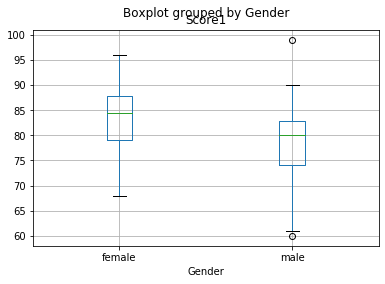

In [17]:
boxplot = data.boxplot(column=['Score1'], by='Gender')

### 第10題

In [18]:
# read data from csv file
data = pd.read_csv("titanic.csv")
data.head()

,name,gender,age,class,fare,survival
0,"ALLEN, Miss Elisabeth Walton",1,29,1,211.0,1
1,"ALLISON, Mr Hudson Joshua Creighton",0,30,1,151.0,0
2,"ALLISON, Mrs Bessie Waldo",1,25,1,151.0,0
3,"ALLISON, Miss Helen Loraine",1,2,1,151.0,0
4,"ALLISON, Master Hudson Trevor",0,1,1,151.0,1


In [19]:
data.count()

name        2208
gender      2208
age         2208
class       2208
fare        1317
survival    2208
dtype: int64

In [20]:
data = data.dropna()
data = data[data['fare'] != 9999]
data.count()

name        1291
gender      1291
age         1291
class       1291
fare        1291
survival    1291
dtype: int64

#### (1)女生存活比例是否高於男生？(gender：0表男性，1表女性)

1. H<sub>0</sub>: $\bar{P1}-\bar{P0}<0$, H<sub>1</sub>: $\bar{P1}-\bar{P0}>=0$
2. 假設兩個獨立，$\bar{P1}-\bar{P0}=0.484$, $Var(\bar{P1}-\bar{P0})=Var(\bar{P1})+Var(\bar{P0})=0.378$
3. 95%信賴區間：$(0.45, 0.52)$
4. 信賴區間皆大於0，所以在5%顯著水準下，接受虛無假設。(女生存活比例高於男生)

In [21]:
p0 = data.groupby(['gender'])['survival'].mean()[0]
p1 = data.groupby(['gender'])['survival'].mean()[1]
mean = p1 - p0
mean

0.4841262359644713

In [22]:
var0 = data.groupby(['gender'])['survival'].var()[0]
var1 = data.groupby(['gender'])['survival'].var()[1]
var = var1 + var0
var

0.37772678789062697

In [23]:
std = np.sqrt(var)
std

0.6145948160297375

In [24]:
stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(data['gender'].count()))

(0.4506008441151839, 0.5176516278137586)

#### (2) 票價最高的1/4(含第3四分位數)與最低的1/4(含第1四分位數)存活比例是否相同？
1. H<sub>0</sub>: $\bar{Ph}-\bar{Pl}=0$, H<sub>1</sub>: $\bar{Ph}-\bar{Pl}\neq0$
2. 假設兩個獨立，$\bar{Ph}-\bar{Pl}=0.351$, $Var(\bar{Ph}-\bar{Pl})=Var(\bar{Ph})+Var(\bar{Pl})=0.421$
3. 95%信賴區間：$(0.30, 0.40)$
4. 信賴區間不包括0，所以在5%顯著水準下，拒絕虛無假設。(存活比例不同)

In [25]:
q1 = data['fare'].quantile(0.25)
q3 = data['fare'].quantile(0.75)

In [26]:
high = data[data['fare'] >= q3]['survival']
low = data[data['fare'] <= q1]['survival']

In [27]:
ph = high.mean()
pl = low.mean()
mean = ph - pl
mean

0.35059407233320283

In [28]:
varh = high.var()
varl = low.var()
var = varh + varl
var

0.4214654023229071

In [29]:
std = np.sqrt(var)
std

0.649203667829216

In [30]:
stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(high.count()+low.count()))

(0.3017272376393619, 0.3994609070270438)